In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

plt.style.use(["science","bright","grid"])

In [12]:
# Network
L           = 15
N_E         = 8
TOPOLOGY    = {"Nx": L,"Ny": L, "e_pos": [
    [(L-1)//2, 0],[0, 0],[L-1, 0],
    [0, (L-1)//2],[L-1, (L-1)//2],
    [0, L-1],[L-1, L-1],[(L-1)//2, L-1]],
    "electrode_type": ['constant']*N_E}


# Voltage
V_INPUT_MAX = 0.03
V_CTRL_VALS = [0.0,0.005,0.01,0.015,0.02,0.025,0.03]
V_CTRL_POS  = [1,3,5]
N_INPUTS    = 250

# PATH = "/mnt/c/Users/jonas/Desktop/phd/data/1_funding_period/iv_curves/ctrl_sweep/"
PATH = "/home/j/j_mens07/phd/data/1_funding_period/iv_curves/ctrl_sqeep/"

In [13]:
x   = np.round(np.linspace(0, V_INPUT_MAX, N_INPUTS),4)
pos = 1
i   = 0
df  = pd.read_csv(f"{PATH}Nx={L}_Ny={L}_Ne={N_E}_{pos}_{i}.csv")
y   = df.loc[:,'Observable'].values
y_e = df.loc[:,'Error'].values

y_vals = {}
y_errs = {}
for pos in V_CTRL_POS:
    y_vals[pos] = {}
    y_errs[pos] = {}
    for i, V_ctrl in enumerate(V_CTRL_VALS):
        if i!=0:
            df = pd.read_csv(f"{PATH}Nx={L}_Ny={L}_Ne={N_E}_{pos}_{i}.csv")
            y_vals[pos][i] = df.loc[:,'Observable'].values
            y_errs[pos][i] = df.loc[:,'Error'].values

FileNotFoundError: [Errno 2] No such file or directory: '/home/j/j_mens07/phd/data/1_funding_period/iv_curves/ctrl_sqeep/Nx=15_Ny=15_Ne=8_3_4.csv'

In [14]:
len(y)

250

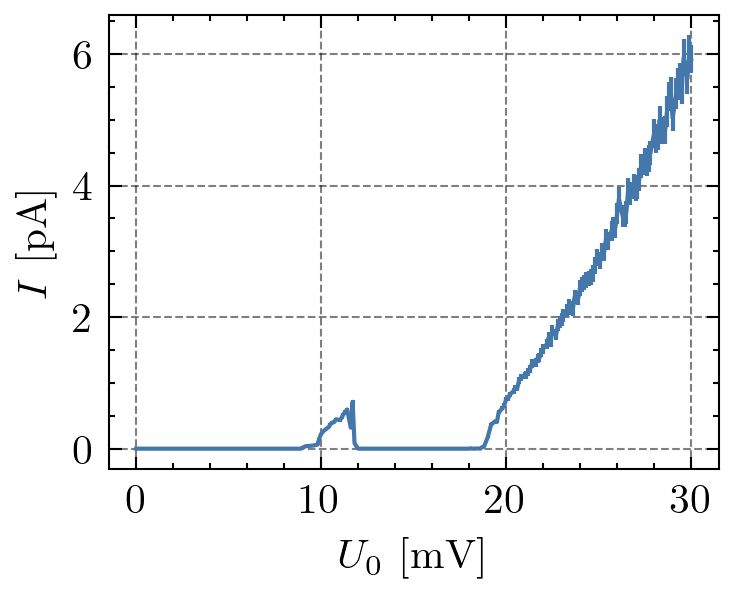

In [17]:
fig, ax = plt.subplots(dpi=300)
w, h    = fig.get_size_inches()
scale   = 0.75
_       = fig.set_size_inches(w * scale, h * scale)

_ = ax.errorbar(x=x*1000, y=y*1e-6, yerr=y_e*1e-6)
_ = ax.set_xlabel("$U_0~[\mathrm{mV}]$")
_ = ax.set_ylabel("$I~[\mathrm{pA}]$")
# _ = ax.set_xlim(0,30)

ValueError: 'x' and 'y' must have the same size

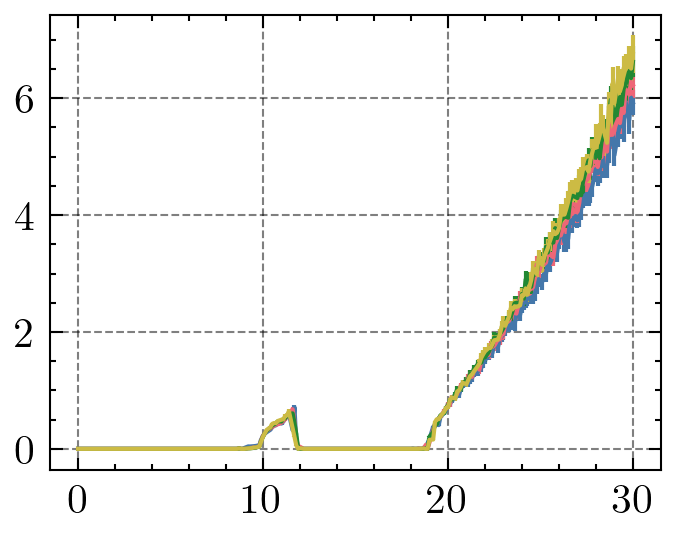

In [19]:
fig, ax = plt.subplots(dpi=300)
w, h    = fig.get_size_inches()
scale   = 0.75
_       = fig.set_size_inches(w * scale, h * scale)

pos = 1
_   = ax.errorbar(x=x*1000, y=y*1e-6, yerr=y_e*1e-6)
for i in y_vals[pos].keys():
    _ = ax.errorbar(x=x*1000, y=y_vals[pos][i]*1e-6, yerr=y_errs[pos][i]*1e-6, label=f'$U_{pos} = {V_CTRL_VALS[i]*1000}~\mathrm{{mV}}$')
_   = ax.set_xlabel("$U_0~[\mathrm{mV}]$")
_   = ax.set_ylabel("$I~[\mathrm{pA}]$")
# _   = ax.legend(fontsize='small')
_   = ax.set_xlim(0,30)